In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf
import seaborn as sns
import scipy.stats as stats


In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp2_speech

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
s5_file='input/child-talking-theres-a-daddy.wav'
s4_file='input/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='input/mathias-words-request.wav'

In [4]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_23700\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [5]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

In [6]:
W = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.

component 0
iteration : 0 : distance 0.0937187671661377
iteration : 1 : distance 0.004038214683532715
iteration : 2 : distance 5.364418029785156e-07
iteration : 3 : distance 0.0
component 1
iteration : 0 : distance 0.26750099658966064
iteration : 1 : distance 0.16475343704223633
iteration : 2 : distance 0.01776212453842163
iteration : 3 : distance 5.418062210083008e-05
iteration : 4 : distance 0.0
component 2
iteration : 0 : distance 0.2889407277107239
iteration : 1 : distance 1.1920928955078125e-07
iteration : 2 : distance 0.0


In [8]:
unMixed = np.dot(W,Xw)


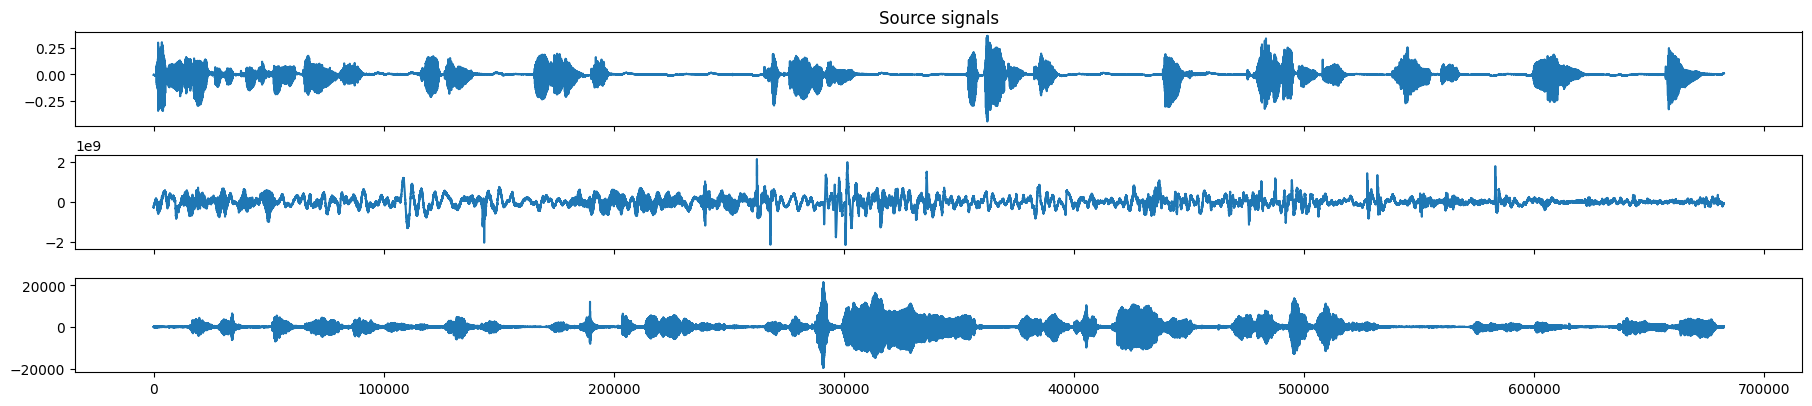

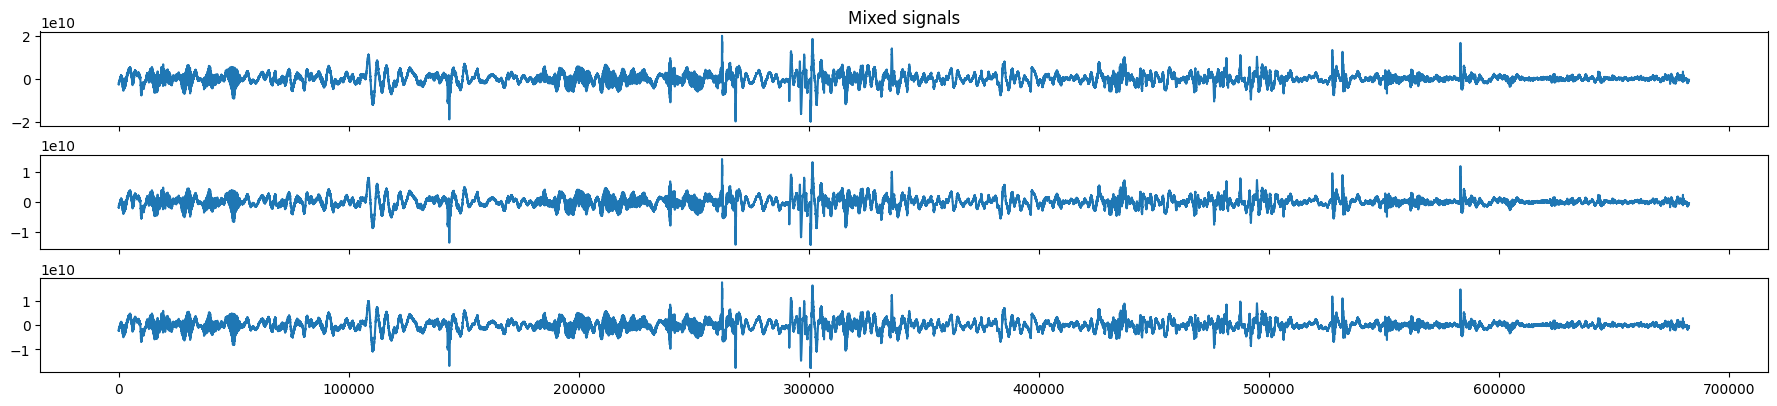

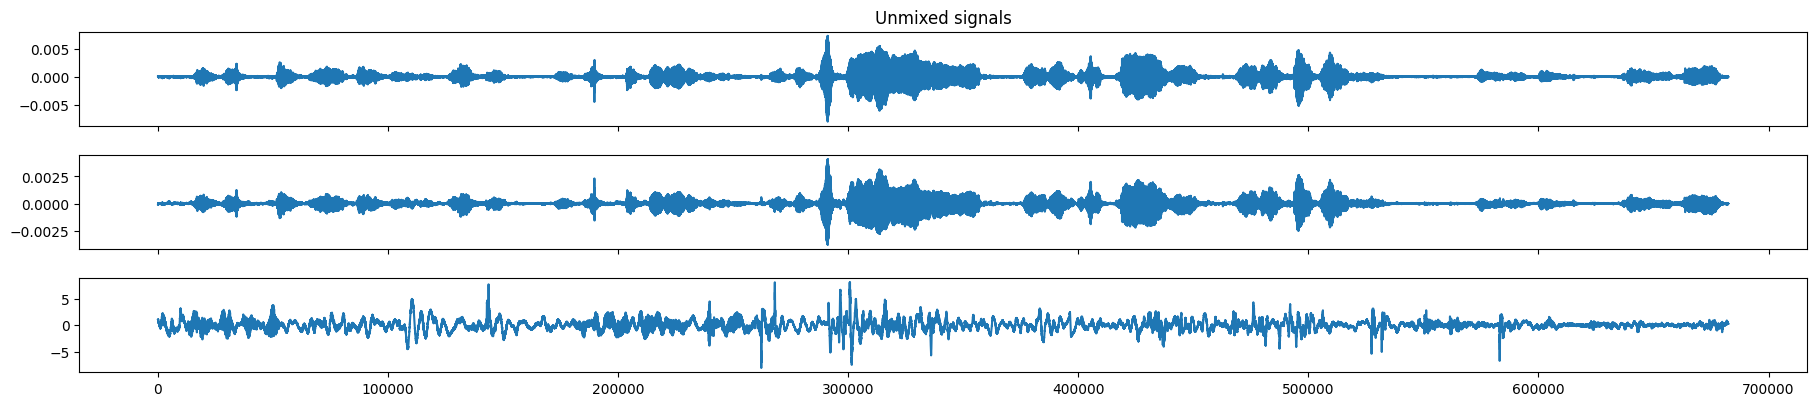

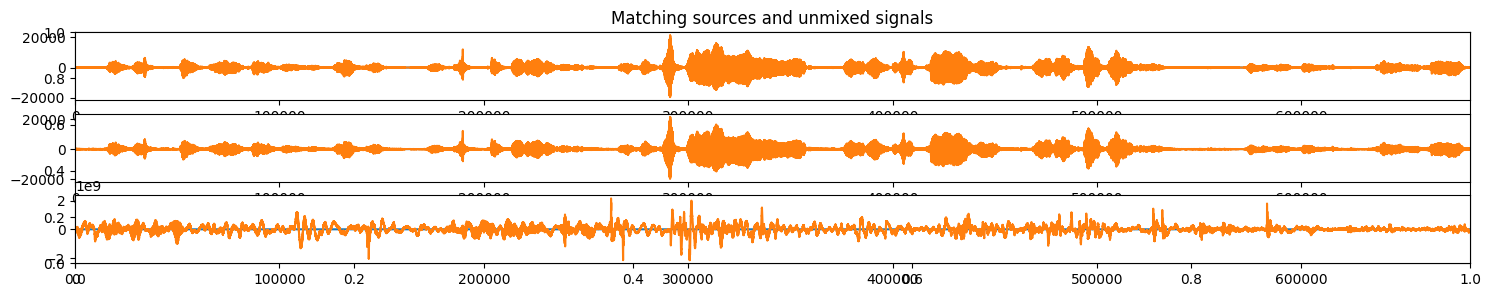

In [10]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)

The signal that has very low amplitude is not recovered. We try again but this time we normalise the sources beforehand : 

In [11]:
S, X, Xw = mix_sources(S)
W = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.
unMixed = np.dot(W,Xw)


component 0
iteration : 0 : distance 0.05507868528366089
iteration : 1 : distance 0.03224748373031616
iteration : 2 : distance 0.0011610984802246094
iteration : 3 : distance 4.124641418457031e-05
iteration : 4 : distance 1.430511474609375e-06
iteration : 5 : distance 0.0
component 1
iteration : 0 : distance 0.3630192279815674
iteration : 1 : distance 1.4841556549072266e-05
iteration : 2 : distance 1.1920928955078125e-07
iteration : 3 : distance 0.0
component 2
iteration : 0 : distance 0.9897258812561631
iteration : 1 : distance 1.1920928955078125e-07
iteration : 2 : distance 1.1920928955078125e-07


PearsonRResult(statistic=0.9998652859260408, pvalue=0.0)
PearsonRResult(statistic=0.9996762620608985, pvalue=0.0)
PearsonRResult(statistic=0.9998745491294362, pvalue=0.0)


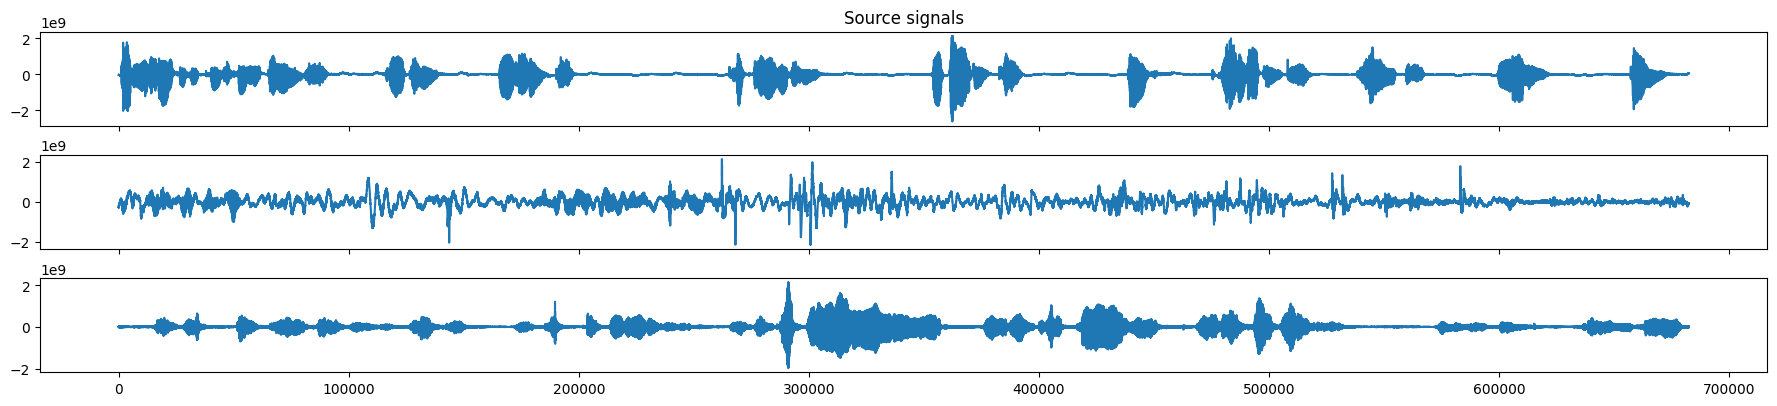

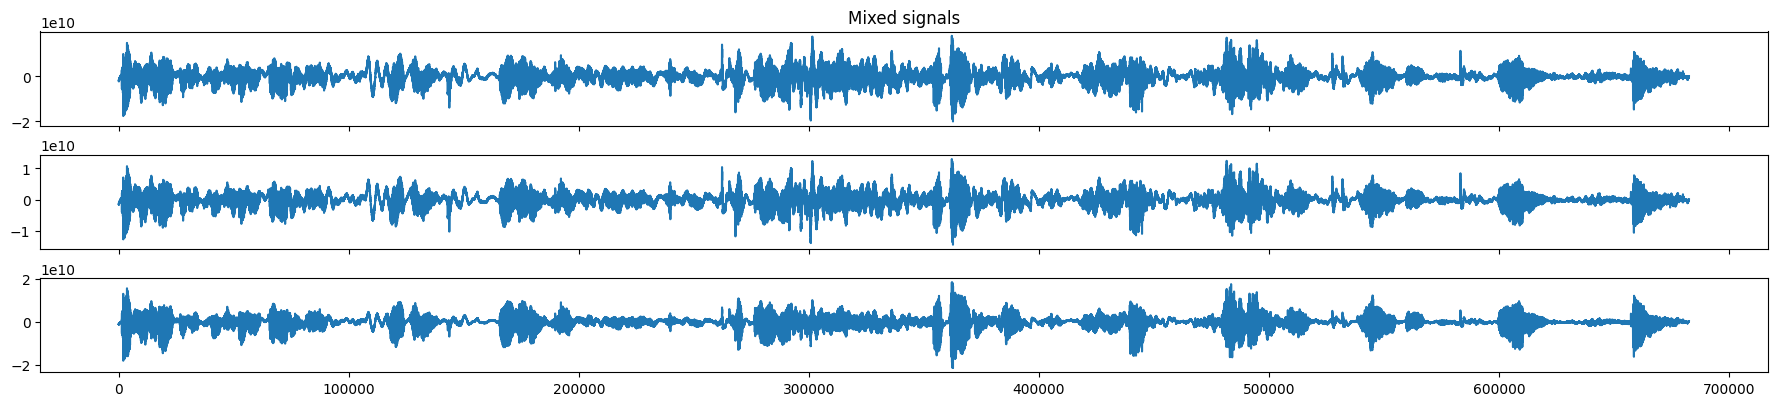

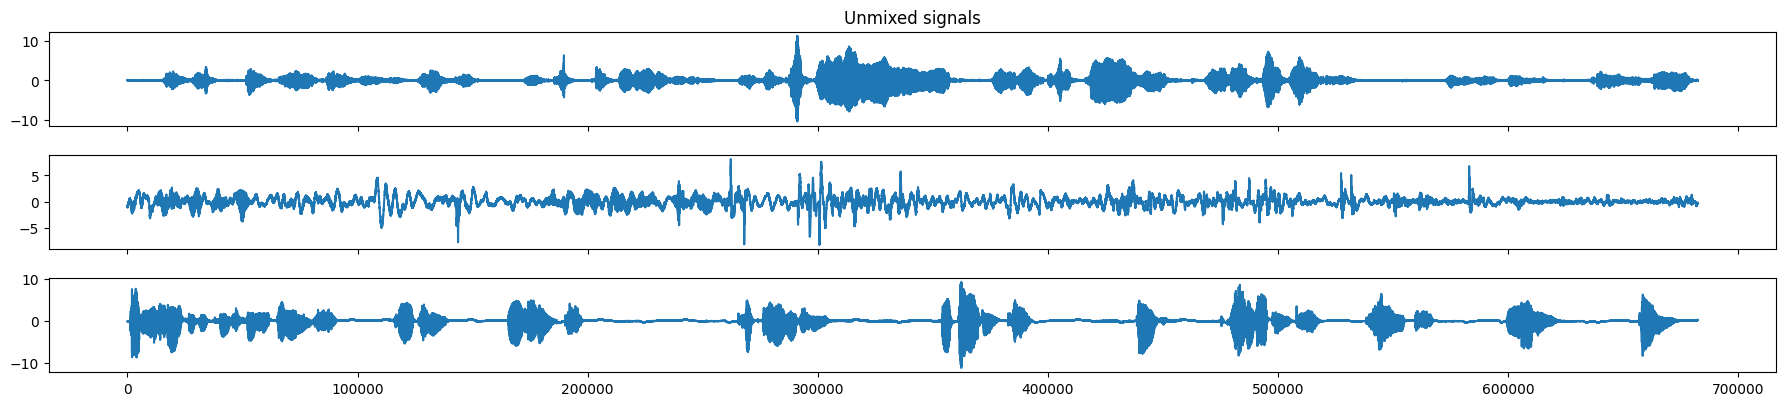

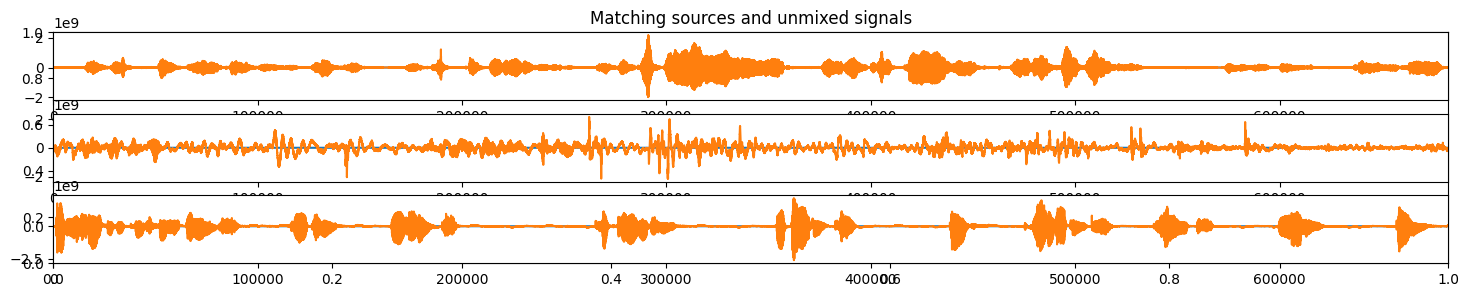

In [29]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    print(stats.pearsonr(S[perm], unMixed[i]))
    # ax.set_ylim(-1.5, 1.5)

In [13]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))

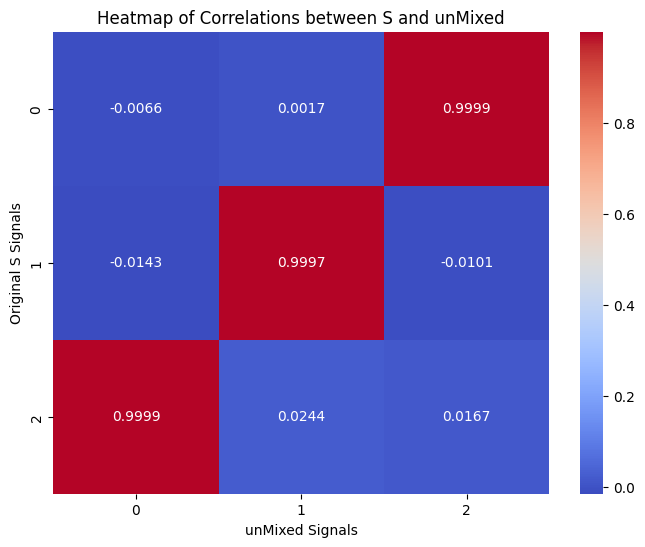

In [30]:
n_signals = S.shape[0]
correlation_matrix = np.zeros((n_signals, n_signals))

# Compute the correlation matrix
for i in range(n_signals):
    for j in range(n_signals):
        correlation_matrix[i, j], _ = stats.pearsonr(S[i], unMixed[j])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Heatmap of Correlations between S and unMixed")
plt.xlabel("unMixed Signals")
plt.ylabel("Original S Signals")
plt.show()
